In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [4]:
# load dataset and show the first five sample
import pandas as pd

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# describe data
data_description = df.describe()

print(data_description)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [6]:
# create new dataframe that consist only annual income and spending score
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print(new_df.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


Before we analyze our data, we need to scale the data with standardization method

In [9]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_df)

scaled_df = pd.DataFrame(scaled_data, columns=['Income', 'Spending'])

print(scaled_df.head())

     Income  Spending
0 -1.738999 -0.434801
1 -1.738999  1.195704
2 -1.700830 -1.715913
3 -1.700830  1.040418
4 -1.662660 -0.395980


In [10]:
# get stastical information on the new dataset
scaled_data_description = scaled_df.describe()

print(scaled_data_description)

             Income      Spending
count  2.000000e+02  2.000000e+02
mean  -2.131628e-16 -1.465494e-16
std    1.002509e+00  1.002509e+00
min   -1.738999e+00 -1.910021e+00
25%   -7.275093e-01 -5.997931e-01
50%    3.587926e-02 -7.764312e-03
75%    6.656748e-01  8.851316e-01
max    2.917671e+00  1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

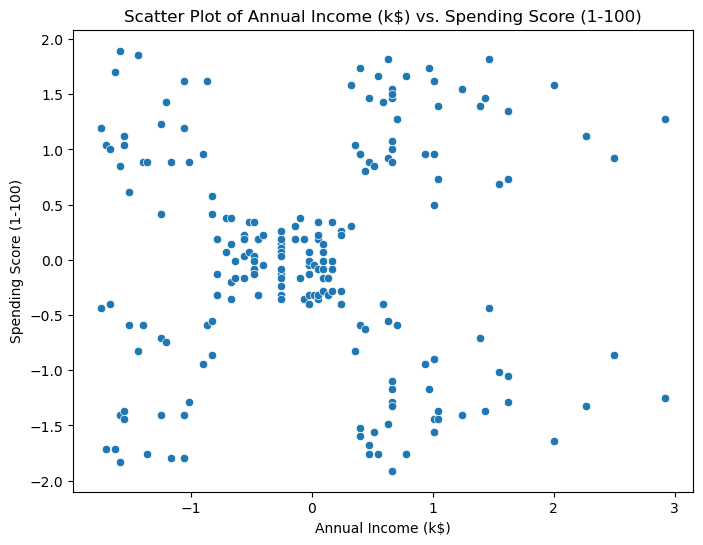

In [24]:
# Visualize the position

import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns to remove spaces and special characters
scaled_df.columns = ['Annual Income (k$)', 'Spending Score (1-100)']

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=scaled_df)
plt.title('Scatter Plot of Annual Income (k$) vs. Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

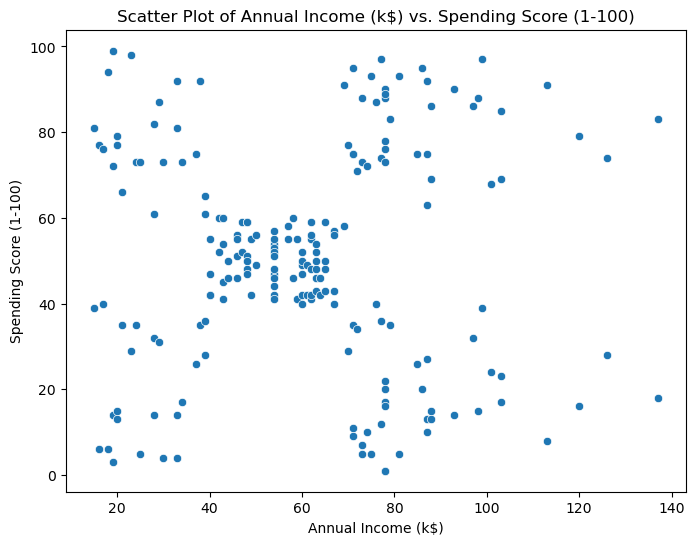

In [26]:
# Visualize the position using the original scale

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using the original scale
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=new_df)
plt.title('Scatter Plot of Annual Income (k$) vs. Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [54]:
# assign cluster with K-Means algorithm

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, max_iter=300, init="random")

kmeans.fit(dfafterscaled)

cluster_labels = kmeans.labels_

print(cluster_labels)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 1 4 2 4 1 4 1 4 2 4 1 4 1 4 1 4 1 4 2 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualize your result based on income and spending. You also can show the final position of the centroid.

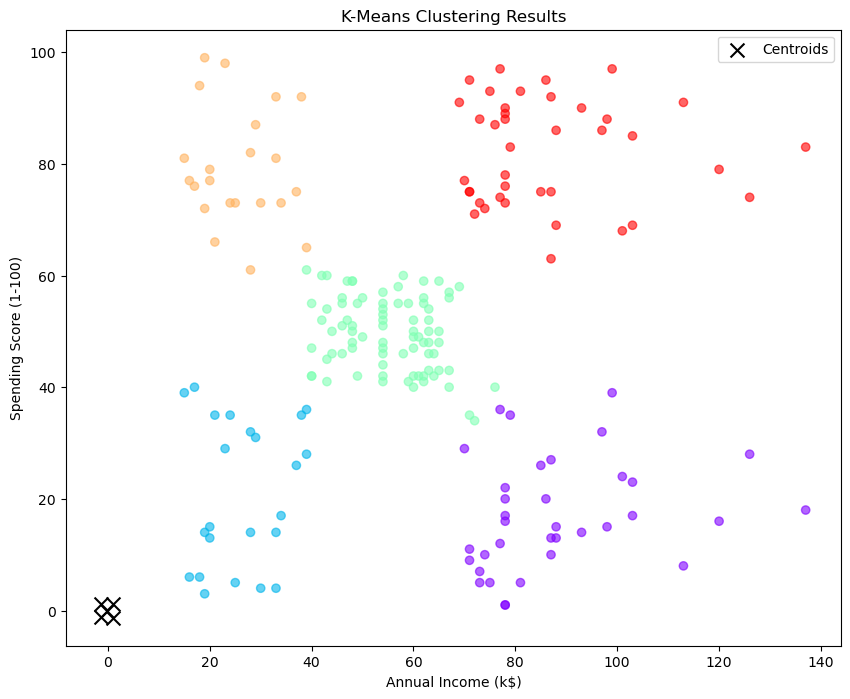

In [68]:
# visualize the result using scater chart
import matplotlib.pyplot as plt

centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=scaled_df['Cluster'], cmap='rainbow', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/pyt

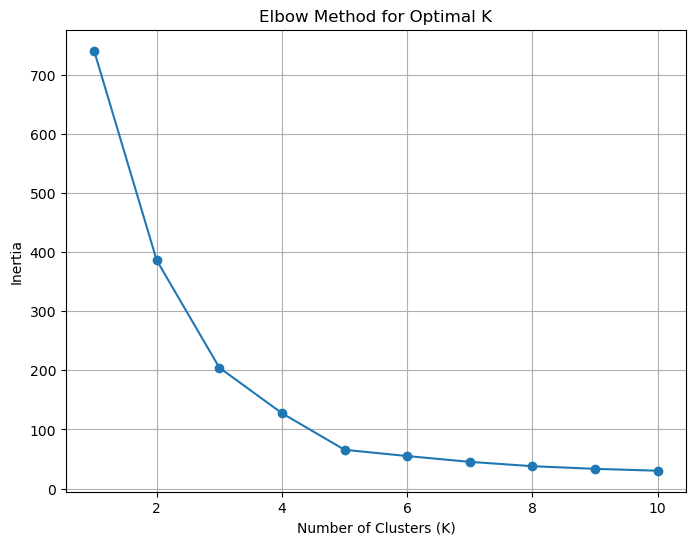

In [45]:
# set the parameter for evaluating K

# check the inertia for each K

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 11)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/pyt

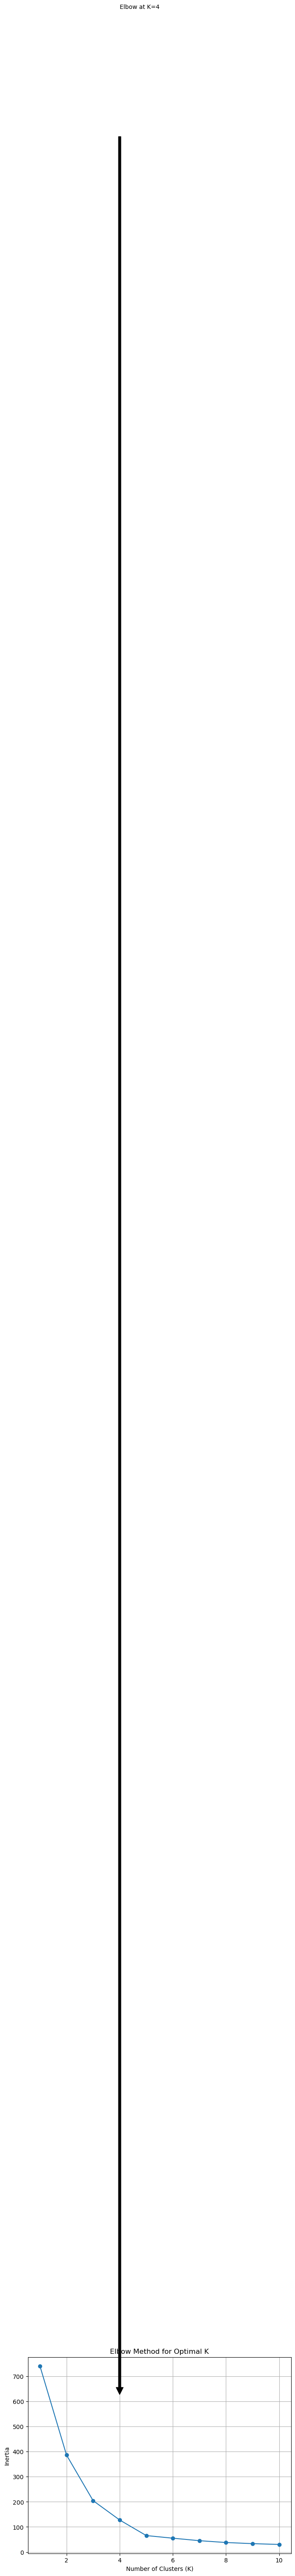

In [43]:
# manually visualize the elbow method using plotlib

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = range(1, 11)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

elbow_point = 4

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.annotate(f'Elbow at K={elbow_point}', (elbow_point, inertia_values[elbow_point - 1]), xytext=(elbow_point, inertia_values[elbow_point - 1] + 10000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/pyt

The best K for your model is 3


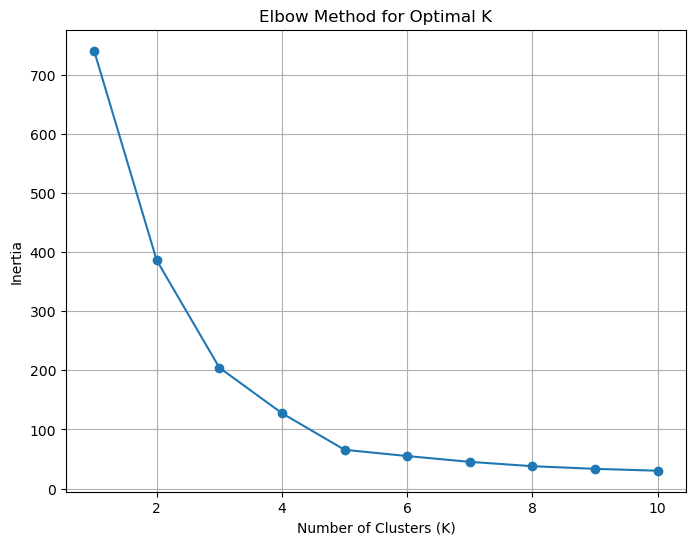

In [44]:
# using kneelocator to find the elbow/knee

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

k_values = range(1, 11)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

kneedle = KneeLocator(list(k_values), inertia_values, curve='convex', direction='decreasing')

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

print(f"The best K for your model is {kneedle.elbow}")